The First table categorizes areas based on a certain ratio (presumably seismic risk).

First we want to input the description and get the corresponding ratio as output.

We will define a function for this purpose:

In [1]:
def get_ratio(description):
    ratios = {
        "پهنه با خطر نسبی خیلی زیاد": 0.35,
        "پهنه با خطر نسبی زیاد": 0.30,
        "پهنه با خطر نسبی متوسط": 0.25,
        "پهنه با خطر نسبی کم": 0.20
    }
    return ratios.get(description, "Description not found")


The second table maps building classifications to their importance coefficients.

We want to input the building classification and get the corresponding importance coefficient as output.

We will define a function for this purpose:

In [2]:
def get_importance_coefficient(classification):
    coefficients = {
        "گروه 1": 1.4,
        "گروه 2": 1.2,
        "گروه 3": 1.0,
        "گروه 4": 0.8
    }
    return coefficients.get(classification, "Classification not found")


The third table provides parameters based on the type of soil and the level of seismic risk.

First, we will define a function to get the $T_S$ and $T_0$ values based on the type of soil. Then, we will define another function to get the $S$ and $S_0$ values based on the type of soil and the seismic risk level.

In [3]:
def get_soil_parameters(soil_type):
    soil_parameters = {
        "I": {"Ts": 0.4, "T0": 0.1},
        "II": {"Ts": 0.5, "T0": 0.15},
        "III": {"Ts": 0.7, "T0": 0.2},
        "IV": {"Ts": 1.0, "T0": 0.3}
    }
    return soil_parameters.get(soil_type, "Soil type not found")

def get_seismic_parameters(soil_type, seismic_risk):
    seismic_parameters = {
        "I": {"low_medium": {"S0": 1, "S": 1.25}, "high_very_high": {"S0": 1, "S": 1.25}},
        "II": {"low_medium": {"S0": 1, "S": 1.25}, "high_very_high": {"S0": 1, "S": 1.25}},
        "III": {"low_medium": {"S0": 1, "S": 1.25}, "high_very_high": {"S0": 1, "S": 1.5}},
        "IV": {"low_medium": {"S0": 1.3, "S": 1.75}, "high_very_high": {"S0": 1.1, "S": 2.25}}
    }
    if soil_type in seismic_parameters:
        return seismic_parameters[soil_type].get(seismic_risk, "Seismic risk level not found")
    else:
        return "Soil type not found"

# Example usage:
soil_type = "III"  # Example input
seismic_risk = "high_very_high"  # Example input

soil_params = get_soil_parameters(soil_type)
seismic_params = get_seismic_parameters(soil_type, seismic_risk)

print("Soil Parameters:", soil_params)
print("Seismic Parameters:", seismic_params)


Soil Parameters: {'Ts': 0.7, 'T0': 0.2}
Seismic Parameters: {'S0': 1, 'S': 1.5}


To calculate the building response coefficient $B$, we need to follow the steps mentioned in the image. Our outline of work will be as below:

1.  Get the soil type and the corresponding parameters $T_S$ and$T_0$.
2.  Get the seismic risk level and the corresponding parameters $S$ and $S_0$.
3.  Compare the provided $T$ value with $T_0$ and $T_S$ to determine $B_1$.
4.  Finally, compute $B$ using $B = B_1 ⋅ N$.

**Step 1: Define the function to get soil parameters**

In [4]:
def get_soil_parameters(soil_type):
    soil_parameters = {
        "I": {"Ts": 0.4, "T0": 0.1},
        "II": {"Ts": 0.5, "T0": 0.15},
        "III": {"Ts": 0.7, "T0": 0.2},
        "IV": {"Ts": 1.0, "T0": 0.3}
    }
    return soil_parameters.get(soil_type, "Soil type not found")


**Step 2: Define the function to get seismic parameters**

In [5]:
def get_seismic_parameters(soil_type, seismic_risk):
    seismic_parameters = {
        "I": {"low_medium": {"S0": 1, "S": 1.25}, "high_very_high": {"S0": 1, "S": 1.25}},
        "II": {"low_medium": {"S0": 1, "S": 1.25}, "high_very_high": {"S0": 1, "S": 1.25}},
        "III": {"low_medium": {"S0": 1, "S": 1.25}, "high_very_high": {"S0": 1, "S": 1.5}},
        "IV": {"low_medium": {"S0": 1.3, "S": 1.75}, "high_very_high": {"S0": 1.1, "S": 2.25}}
    }
    if soil_type in seismic_parameters:
        return seismic_parameters[soil_type].get(seismic_risk, "Seismic risk level not found")
    else:
        return "Soil type not found"


**Step 3: Define the function to compute $B_1$**

In [6]:
def compute_B1(T, T0, Ts, S0, S):
    if 0 < T <= T0:
        B1 = S0 + (S - S0 + 1) * (T / T0)
    elif T0 < T <= Ts:
        B1 = S + 1
    elif T > Ts:
        B1 = (S + 1) * (Ts / T)
    return B1


**Step 4: Define the main function to compute $B$**

In [7]:
def compute_B(T, N, soil_type, seismic_risk):
    soil_params = get_soil_parameters(soil_type)
    if soil_params == "Soil type not found":
        return soil_params

    seismic_params = get_seismic_parameters(soil_type, seismic_risk)
    if seismic_params == "Seismic risk level not found":
        return seismic_params

    T0 = soil_params["T0"]
    Ts = soil_params["Ts"]
    S0 = seismic_params["S0"]
    S = seismic_params["S"]

    B1 = compute_B1(T, T0, Ts, S0, S)
    B = B1 * N

    return B


In [8]:
# Example usage
# With example inputs
T = 0.25  # Example input for T
N = 1.2  # Example input for N
soil_type = "III"  # Example input for soil type
seismic_risk = "high_very_high"  # Example input for seismic risk level

# Compute B
B = compute_B(T, N, soil_type, seismic_risk)
print("B:", B)


B: 3.0


Now to generate the requested graphs for each soil type and save the $B_1$ and $T$ values in separate CSV files, we need to iterate through each soil type, compute the $B_1$ values for a range of $T$ values, and plot the results. Then, we'll save the data in CSV format.



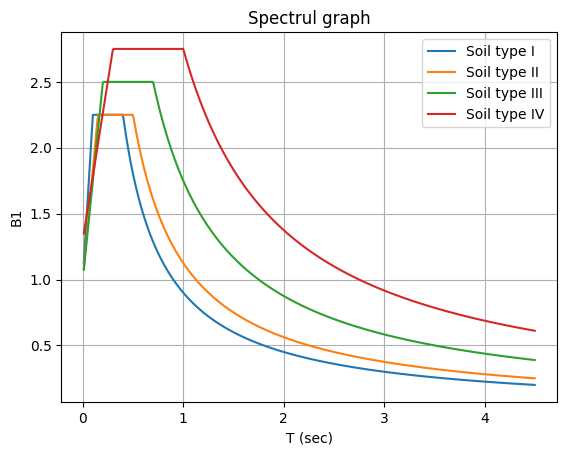

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def compute_B1_for_T_range(T_values, T0, Ts, S0, S):
    B1_values = []
    for T in T_values:
        if 0 < T <= T0:
            B1 = S0 + (S - S0 + 1) * (T / T0)
        elif T0 < T <= Ts:
            B1 = S + 1
        elif T > Ts:
            B1 = (S + 1) * (Ts / T)
        B1_values.append(B1)
    return B1_values

# Example parameters for each soil type
soil_types = {
    "I": {"T0": 0.1, "Ts": 0.4, "S0": 1.0, "S": 1.25},
    "II": {"T0": 0.15, "Ts": 0.5, "S0": 1.0, "S": 1.25},
    "III": {"T0": 0.2, "Ts": 0.7, "S0": 1.0, "S": 1.5},
    "IV": {"T0": 0.3, "Ts": 1.0, "S0": 1.3, "S": 1.75}
}

# Range of T values
T_values = np.linspace(0.01, 4.5, 500)  # Avoid zero to prevent division by zero

# Plotting and saving the data
for soil_type, params in soil_types.items():
    T0 = params["T0"]
    Ts = params["Ts"]
    S0 = params["S0"]
    S = params["S"]

    # Compute B1 values
    B1_values = compute_B1_for_T_range(T_values, T0, Ts, S0, S)

    # Save to CSV
    df = pd.DataFrame({"T": T_values, "B1": B1_values})
    df.to_csv(f"B1_T_values_soil_{soil_type}.csv", index=False)

    # Plotting the graph
    plt.plot(T_values, B1_values, label=f"Soil type {soil_type}")

plt.xlabel("T (sec)")
plt.ylabel("B1")
plt.title("Spectrul graph")
plt.legend()
plt.grid(True)
plt.show()
